In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#bert model
from transformers import BertModel, BertTokenizer

import warnings
warnings.filterwarnings("ignore")

c:\Users\farha\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# load dataset
data_aia = pd.read_csv('Fix_Dataset/asuransi_aia.csv', sep=',')
data_allianz = pd.read_csv('Fix_Dataset/asuransi_allianz.csv', sep=',')
data_cigna = pd.read_csv('Fix_Dataset/asuransi_cigna.csv', sep=',')
data_manulife = pd.read_csv('Fix_Dataset/asuransi_manulife.csv', sep=',')
data_bni = pd.read_csv('Fix_Dataset/asuransi_bni.csv', sep=',')
data_prudential = pd.read_csv('Fix_Dataset/asuransi_prudential.csv', sep=',')
data_sinarmas = pd.read_csv('Fix_Dataset/asuransi_sinarmas.csv', sep=',')
data_Testimoni = pd.read_csv('Fix_Dataset/asuransi_testimoni.csv', sep=',')

In [3]:
frame = [data_aia,data_allianz,data_cigna,data_manulife,data_bni,data_prudential]

data = pd.concat(frame)

In [4]:
data.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,Produk
0,Mon Sep 25 06:06:11 +0000 2023,1706188329295966416,"@shintaaraa_ 1.5 jt per tahun sist, bukan kant...",0,1,0,0,in,431418842,1706122633287553370,Ditanyadia,https://twitter.com/Ditanyadia/status/17061883...,AIA
1,Fri Sep 22 14:15:41 +0000 2023,1705224351996641705,@kumparan Mohon klarifikasi dr pihak asuransi ...,0,0,0,0,in,549841921,1705184059335532911,MuhTaufikRahmat,https://twitter.com/MuhTaufikRahmat/status/170...,AIA
2,Fri Sep 22 06:47:25 +0000 2023,1705111541975314830,🔔𝙇𝙊𝙆𝙀𝙍 𝙅𝘼𝘽𝙊𝘿𝙀𝙏𝘼𝘽𝙀𝙆 𝙉𝙊𝙏𝙀: buka link tautan mel...,0,0,0,0,in,1515856096933539840,1705111541975314830,ayusukaijo,https://twitter.com/ayusukaijo/status/17051115...,AIA
3,Fri Sep 22 06:44:36 +0000 2023,1705110832282230799,🔔𝙇𝙊𝙆𝙀𝙍 𝙅𝘼𝘽𝙊𝘿𝙀𝙏𝘼𝘽𝙀𝙆 𝙉𝙊𝙏𝙀: buka link tautan mel...,0,0,0,0,in,1298647119402643456,1705110832282230799,u2brosist,https://twitter.com/u2brosist/status/170511083...,AIA
4,Thu Sep 21 09:11:43 +0000 2023,1704785467294826746,#AIA #AIA Indonesia #Asuransi Unit Link 5 Tips...,0,0,0,0,in,1519622250089283584,1704785467294826746,fiona99351131,https://twitter.com/fiona99351131/status/17047...,AIA


In [5]:
data.isnull().sum()

created_at             0
id_str                 0
full_text              0
quote_count            0
reply_count            0
retweet_count          0
favorite_count         0
lang                   0
user_id_str            0
conversation_id_str    0
username               0
tweet_url              0
Produk                 0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3307 entries, 0 to 358
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   created_at           3307 non-null   object
 1   id_str               3307 non-null   int64 
 2   full_text            3307 non-null   object
 3   quote_count          3307 non-null   int64 
 4   reply_count          3307 non-null   int64 
 5   retweet_count        3307 non-null   int64 
 6   favorite_count       3307 non-null   int64 
 7   lang                 3307 non-null   object
 8   user_id_str          3307 non-null   int64 
 9   conversation_id_str  3307 non-null   int64 
 10  username             3307 non-null   object
 11  tweet_url            3307 non-null   object
 12  Produk               3307 non-null   object
dtypes: int64(7), object(6)
memory usage: 361.7+ KB


# EDA

<Axes: title={'center': 'Jumlah data berdasarkan Produk'}, ylabel='count'>

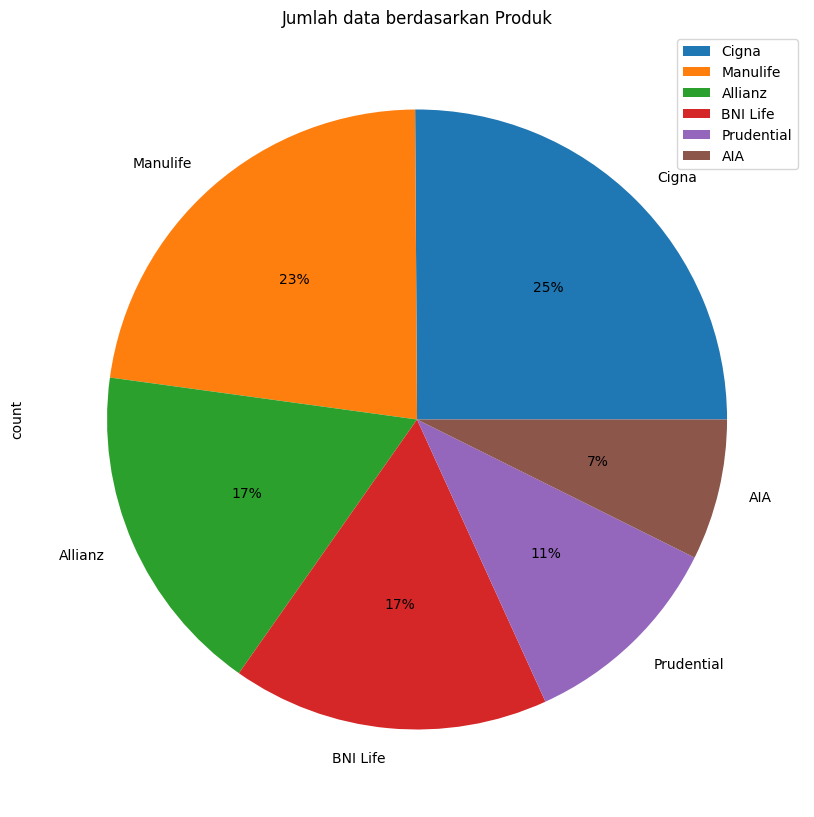

In [7]:
data['Produk'].value_counts().plot(kind='pie', legend=True, autopct='%1.0f%%', figsize=(10,11), title='Jumlah data berdasarkan Produk')

<Axes: ylabel='count'>

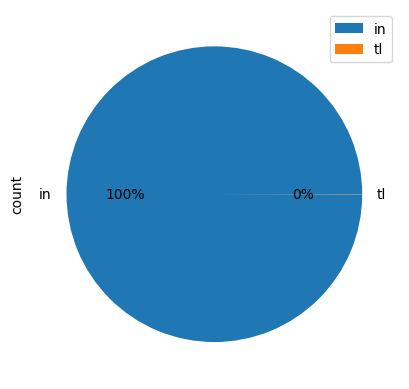

In [8]:
data['lang'].value_counts().plot(kind='pie', legend=True, autopct='%1.0f%%')

In [9]:
data.head(1)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,Produk
0,Mon Sep 25 06:06:11 +0000 2023,1706188329295966416,"@shintaaraa_ 1.5 jt per tahun sist, bukan kant...",0,1,0,0,in,431418842,1706122633287553370,Ditanyadia,https://twitter.com/Ditanyadia/status/17061883...,AIA


In [10]:
data = data.drop(columns=['id_str', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'lang', 'user_id_str','conversation_id_str', 'tweet_url'])

In [11]:
data.head()

,created_at,full_text,username,Produk
0,Mon Sep 25 06:06:11 +0000 2023,"@shintaaraa_ 1.5 jt per tahun sist, bukan kant...",Ditanyadia,AIA
1,Fri Sep 22 14:15:41 +0000 2023,@kumparan Mohon klarifikasi dr pihak asuransi ...,MuhTaufikRahmat,AIA
2,Fri Sep 22 06:47:25 +0000 2023,🔔𝙇𝙊𝙆𝙀𝙍 𝙅𝘼𝘽𝙊𝘿𝙀𝙏𝘼𝘽𝙀𝙆 𝙉𝙊𝙏𝙀: buka link tautan mel...,ayusukaijo,AIA
3,Fri Sep 22 06:44:36 +0000 2023,🔔𝙇𝙊𝙆𝙀𝙍 𝙅𝘼𝘽𝙊𝘿𝙀𝙏𝘼𝘽𝙀𝙆 𝙉𝙊𝙏𝙀: buka link tautan mel...,u2brosist,AIA
4,Thu Sep 21 09:11:43 +0000 2023,#AIA #AIA Indonesia #Asuransi Unit Link 5 Tips...,fiona99351131,AIA


In [12]:
df = pd.concat([data,data_Testimoni])

In [13]:
df.head()

,created_at,full_text,username,Produk
0,Mon Sep 25 06:06:11 +0000 2023,"@shintaaraa_ 1.5 jt per tahun sist, bukan kant...",Ditanyadia,AIA
1,Fri Sep 22 14:15:41 +0000 2023,@kumparan Mohon klarifikasi dr pihak asuransi ...,MuhTaufikRahmat,AIA
2,Fri Sep 22 06:47:25 +0000 2023,🔔𝙇𝙊𝙆𝙀𝙍 𝙅𝘼𝘽𝙊𝘿𝙀𝙏𝘼𝘽𝙀𝙆 𝙉𝙊𝙏𝙀: buka link tautan mel...,ayusukaijo,AIA
3,Fri Sep 22 06:44:36 +0000 2023,🔔𝙇𝙊𝙆𝙀𝙍 𝙅𝘼𝘽𝙊𝘿𝙀𝙏𝘼𝘽𝙀𝙆 𝙉𝙊𝙏𝙀: buka link tautan mel...,u2brosist,AIA
4,Thu Sep 21 09:11:43 +0000 2023,#AIA #AIA Indonesia #Asuransi Unit Link 5 Tips...,fiona99351131,AIA


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3403 entries, 0 to 95
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  3403 non-null   object
 1   full_text   3403 non-null   object
 2   username    3403 non-null   object
 3   Produk      3403 non-null   object
dtypes: object(4)
memory usage: 132.9+ KB


In [15]:
df.isnull().sum()

created_at    0
full_text     0
username      0
Produk        0
dtype: int64

In [16]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['created_at'] = df['created_at'].dt.date

In [17]:
df.head()

,created_at,full_text,username,Produk
0,2023-09-25,"@shintaaraa_ 1.5 jt per tahun sist, bukan kant...",Ditanyadia,AIA
1,2023-09-22,@kumparan Mohon klarifikasi dr pihak asuransi ...,MuhTaufikRahmat,AIA
2,2023-09-22,🔔𝙇𝙊𝙆𝙀𝙍 𝙅𝘼𝘽𝙊𝘿𝙀𝙏𝘼𝘽𝙀𝙆 𝙉𝙊𝙏𝙀: buka link tautan mel...,ayusukaijo,AIA
3,2023-09-22,🔔𝙇𝙊𝙆𝙀𝙍 𝙅𝘼𝘽𝙊𝘿𝙀𝙏𝘼𝘽𝙀𝙆 𝙉𝙊𝙏𝙀: buka link tautan mel...,u2brosist,AIA
4,2023-09-21,#AIA #AIA Indonesia #Asuransi Unit Link 5 Tips...,fiona99351131,AIA


# Data Cleaning

In [18]:
def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'\\x\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r',', '', text)
    text = re.sub(r'#\S+', '', text)
    text = re.sub(r'\s+', ' ', text) 
    text = re.sub(r'haha\S+', '', text)
    text = re.sub(r'wkwk\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\S+', '', text)
    text = re.sub(r'pic\S+', '', text)
    text = re.sub(r'pic.twitter\S+', '', text)
    return text

In [19]:
df['full_text'] = df['full_text'].apply(cleaning_data)
df.head()

,created_at,full_text,username,Produk
0,2023-09-25,1.5 jt per tahun sist bukan kantor sih jatuh ...,Ditanyadia,AIA
1,2023-09-22,mohon klarifikasi dr pihak asuransi cc:,MuhTaufikRahmat,AIA
2,2023-09-22,🔔𝙇𝙊𝙆𝙀𝙍 𝙅𝘼𝘽𝙊𝘿𝙀𝙏𝘼𝘽𝙀𝙆 𝙉𝙊𝙏𝙀: buka link tautan mela...,ayusukaijo,AIA
3,2023-09-22,🔔𝙇𝙊𝙆𝙀𝙍 𝙅𝘼𝘽𝙊𝘿𝙀𝙏𝘼𝘽𝙀𝙆 𝙉𝙊𝙏𝙀: buka link tautan mela...,u2brosist,AIA
4,2023-09-21,indonesia unit link 5 tips self-healing untuk...,fiona99351131,AIA


In [20]:
# hapus teks yang berisi string "buka link"
df.drop(df[df['full_text'].str.contains('buka link')].index, inplace=True)

In [21]:
df.isnull().sum()

created_at    0
full_text     0
username      0
Produk        0
dtype: int64

In [22]:
df['full_text'].duplicated().sum()

168

In [23]:
# drop duplicate data
df.drop_duplicates(subset=['full_text'], inplace=True)

In [24]:
df['full_text'].duplicated().sum()

0

In [25]:
df.head()

,created_at,full_text,username,Produk
0,2023-09-25,1.5 jt per tahun sist bukan kantor sih jatuh ...,Ditanyadia,AIA
1,2023-09-22,mohon klarifikasi dr pihak asuransi cc:,MuhTaufikRahmat,AIA
4,2023-09-21,indonesia unit link 5 tips self-healing untuk...,fiona99351131,AIA
5,2023-09-21,halo bang maaf nimbrung boleh saya dm terkait...,fiayeee,AIA
7,2023-09-18,impactnya akan banyak rs yang rekanan menjadi ...,filcadet,AIA


# preprocessing

## Tokenization

In [26]:
# tokenization
def tokenization(text):
    return word_tokenize(text)

df['full_text'] = df['full_text'].apply(tokenization)

In [27]:
df.head()

,created_at,full_text,username,Produk
0,2023-09-25,"[1.5, jt, per, tahun, sist, bukan, kantor, sih...",Ditanyadia,AIA
1,2023-09-22,"[mohon, klarifikasi, dr, pihak, asuransi, cc, :]",MuhTaufikRahmat,AIA
4,2023-09-21,"[indonesia, unit, link, 5, tips, self-healing,...",fiona99351131,AIA
5,2023-09-21,"[halo, bang, maaf, nimbrung, boleh, saya, dm, ...",fiayeee,AIA
7,2023-09-18,"[impactnya, akan, banyak, rs, yang, rekanan, m...",filcadet,AIA


<section id=stemming> <h1>Stemming</h1>

In [28]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    return stemmer.stem(text)

df['full_text'] = df['full_text'].apply(lambda tokens: [stemming(token) for token in tokens])

In [29]:
df.head()

,created_at,full_text,username,Produk
0,2023-09-25,"[1 5, jt, per, tahun, sist, bukan, kantor, sih...",Ditanyadia,AIA
1,2023-09-22,"[mohon, klarifikasi, dr, pihak, asuransi, cc, ]",MuhTaufikRahmat,AIA
4,2023-09-21,"[indonesia, unit, link, 5, tips, self-healing,...",fiona99351131,AIA
5,2023-09-21,"[halo, bang, maaf, nimbrung, boleh, saya, dm, ...",fiayeee,AIA
7,2023-09-18,"[impactnya, akan, banyak, rs, yang, rekan, jad...",filcadet,AIA


# Stopword

In [30]:
# download dictionary kata dasar untuk mengurangi kata slang dan singkatan
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\farha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\farha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
# remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('indonesian'))
    word_tokens = word_tokenize(text)
    filtered_sentence = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_sentence)

df['full_text'] = df['full_text'].apply(lambda x: remove_stopwords(' '.join(x)))

In [32]:
df.head()

,created_at,full_text,username,Produk
0,2023-09-25,1 5 jt sist kantor sih jatuh nya dr asuransi a...,Ditanyadia,AIA
1,2023-09-22,mohon klarifikasi dr asuransi cc,MuhTaufikRahmat,AIA
4,2023-09-21,indonesia unit link 5 tips self-healing jaga s...,fiona99351131,AIA
5,2023-09-21,halo bang maaf nimbrung dm kait batal polis ai...,fiayeee,AIA
7,2023-09-18,impactnya rs rekan rekan check to your agent u...,filcadet,AIA


## Normalisasi Teks

In [33]:
def convert_slang(text):
    slang_word = pd.read_csv('Normalisasi\kamus_kata.csv', sep=',')
    slang_word_dict = {}
    for index, row in slang_word.iterrows():
        slang_word_dict[row['singkatan']] = row['kata_asli']
    return ' '.join([slang_word_dict[word] if word in slang_word_dict else word for word in text.split()])

df['full_text'] = df['full_text'].apply(convert_slang)

In [34]:
df.head()

,created_at,full_text,username,Produk
0,2023-09-25,1 5 juta sist kantor sih jatuh nya dari asuran...,Ditanyadia,AIA
1,2023-09-22,mohon klarifikasi dari asuransi cc,MuhTaufikRahmat,AIA
4,2023-09-21,indonesia unit link 5 tips self-healing jaga s...,fiona99351131,AIA
5,2023-09-21,halo bang maaf nimbrung pesan kait batal polis...,fiayeee,AIA
7,2023-09-18,impactnya rumah sakit rekan rekan check to you...,filcadet,AIA


In [35]:
# tokenization
df['full_text'] = df['full_text'].apply(tokenization)

# BERT

In [36]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.nn.functional import softmax

In [37]:
# Fungsi untuk menganalisis sentimen tweet
def analisis_sentimen(tweet, model, tokenizer):
    # Tokenisasi teks tweet
    tokens = tokenizer.encode_plus(tweet, add_special_tokens=True, return_tensors='pt')

    # Prediksi sentimen menggunakan model BERT
    with torch.no_grad():
        outputs = model(**tokens)
        logits = outputs.logits

    # Ambil label dengan probabilitas tertinggi
    predicted_label = torch.argmax(logits, dim=1).item()

    return predicted_label, softmax(logits, dim=1).tolist()[0]

In [38]:
# Load pre-trained model dan tokenizer untuk bahasa Indonesia
model_name = 'indobenchmark/indobert-large-p1'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-large-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [39]:
df['rate'] = df['full_text'].apply(lambda x: analisis_sentimen(' '.join(x), model, tokenizer)[0])

In [40]:
df.head()

,created_at,full_text,username,Produk,rate
0,2023-09-25,"[1, 5, juta, sist, kantor, sih, jatuh, nya, da...",Ditanyadia,AIA,2
1,2023-09-22,"[mohon, klarifikasi, dari, asuransi, cc]",MuhTaufikRahmat,AIA,1
4,2023-09-21,"[indonesia, unit, link, 5, tips, self-healing,...",fiona99351131,AIA,2
5,2023-09-21,"[halo, bang, maaf, nimbrung, pesan, kait, bata...",fiayeee,AIA,2
7,2023-09-18,"[impactnya, rumah, sakit, rekan, rekan, check,...",filcadet,AIA,2


<Axes: title={'center': 'Jumlah data berdasarkan Sentimen'}, ylabel='count'>

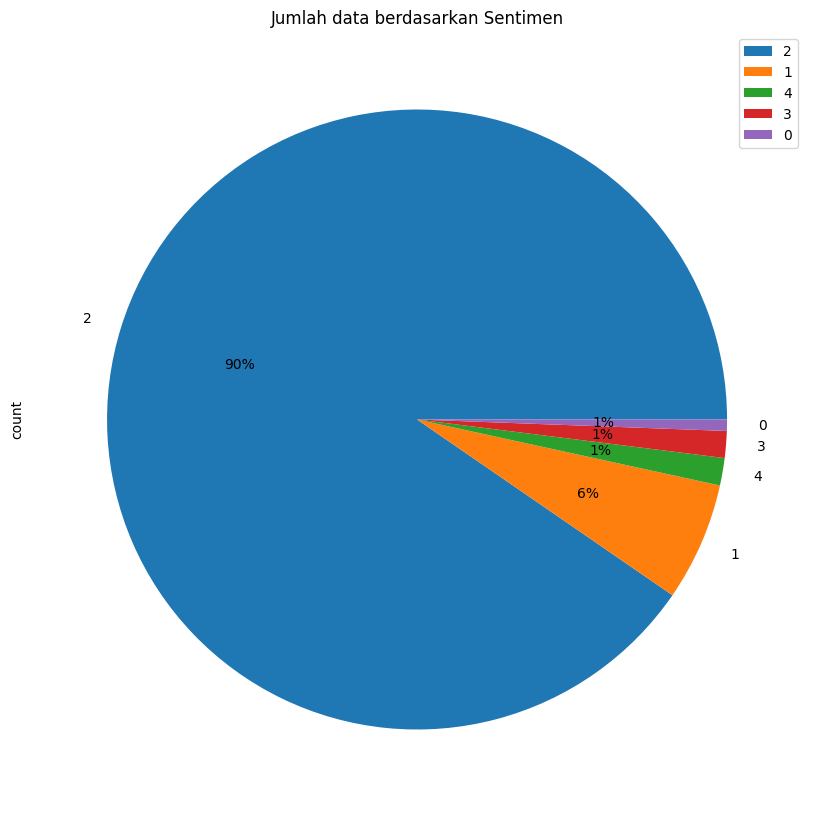

In [42]:
df['rate'].value_counts().plot(kind='pie', legend=True, autopct='%1.0f%%', figsize=(10,11), title='Jumlah data berdasarkan Sentimen')

# save data to csv
df.to_csv('Fix_Dataset/asuransi_clean.csv', index=False)

In [43]:
# save model BERT yang sudah di training menggunakan Pickle
import pickle

with open('Model/model_sentimen.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)